In [15]:
import numpy as np 
import matplotlib.pyplot as plt

TD 1 Calibration

Dans la première partie de ce TD il faut implémenter l'algorythme d'optimisation de Newton / Raphson
Le but étant de trouver le 0 de certaines fonctions et de voir les cas échéant pourquoi ça ne marche pas/ converge pas een plottant la fonction

## Alrgorythme Newton/Raphson

In [16]:

def newton_raphson1(x0, epsilon, max_iterations,f,df):

    #x0 : valeur initiale (point de départ)
    #epsilon : tolérance (nous arrêtons lorsque la différence entre deux itérations successives est inférieure à epsilon)
    #max_iterations : nombre maximum d'itérations
    
    x = x0

    for i in range(max_iterations):
    
        
    #Ici, on rajoute cette condition pour parer au fonction qui se devrait être plate a un moment (i.e. que leur dérivé venait a être égale a 0)
    # Ce que l'on fait, on detecte lorsque la dérivée se rapproche de 0 et lorsque la valeur devient trop faible on prend un nouveau x
    # On fait un saut en avant de 0.001 ici (valeur arbitraire a changer si nécessaire) pareil si x devient trop grand

    
        if abs(df(x)) < 1e-5 :
            x += + 0.001
            continue
    
        
        x_new = x - f(x) / df(x)
            
        
        # Si x devient trop grand ou trop petit, on arrête.
        if abs(x_new) > 1e50: 
            x_new = x - 0.01
     

        # Si la différence est inférieure à epsilon, nous avons trouvé la racine à epsilon près
        if abs(x_new - x) < epsilon:
            return x_new     

        #sinon on réitère l'opération
        x = x_new

    # Si nous atteignons le maximum d'itérations sans convergence, nous renvoyons une erreur
    raise ValueError("L'algorithme de Newton-Raphson n'a pas convergé après {} itérations.".format(max_iterations))


In [17]:

def newton_raphson(x0, epsilon, max_iterations,f,df):

    #x0 : valeur initiale (point de départ)
    #epsilon : tolérance (nous arrêtons lorsque la différence entre deux itérations successives est inférieure à epsilon)
    #max_iterations : nombre maximum d'itérations
    
    x = x0

    for i in range(max_iterations):
           
        x_new = x - f(x) / df(x)
     

        # Si la différence est inférieure à epsilon, nous avons trouvé la racine à epsilon près
        if abs(x_new - x) < epsilon:
            return x_new     

        #sinon on réitère l'opération
        x = x_new

    # Si nous atteignons le maximum d'itérations sans convergence, nous renvoyons une erreur
    raise ValueError("L'algorithme de Newton-Raphson n'a pas convergé après {} itérations.".format(max_iterations))


In [18]:
def plot_function(f, x_range, num_points):
    """
    Trace une fonction donnée sur un intervalle spécifié.

    Args:
    - f (function): La fonction à tracer.
    - x_range (tuple): L'intervalle sur lequel tracer la fonction (min, max).
    - num_points (int): Nombre de points à utiliser pour le tracé.

    
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = f(x)

    plt.plot(x, y, label="y = " + f.__name__ + "(x)")

    plt.title("Représentation de la fonction y = " + f.__name__ + "(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()




Essayons avec la première fonction : 𝑥 ⟼ 𝑒𝑥𝑝(𝑥) − 2

- Premièrement nous allons représenter cette fonction
- Ensuite determiner graphiquement un x0 qui va mener a une convergence et trouver le 0 avec l'algo
- Finalement nous allons déterminer les points initiaux pour lesquels cet algorithme diverge

In [19]:
def f1(x) :
    return np.exp(x) - 2

In [20]:
def df1(x) :
    return np.exp(x)

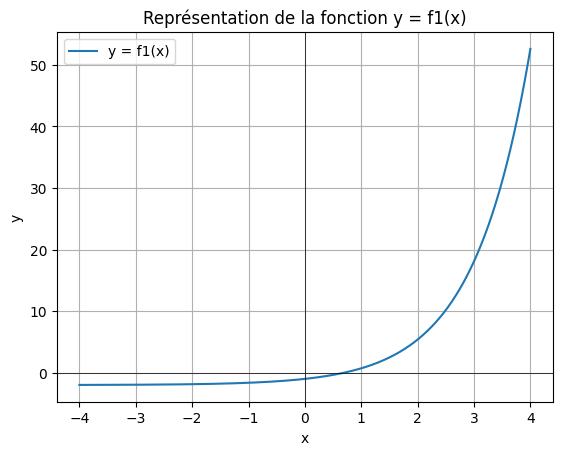

In [21]:
plot_function(f1,(-4,4),1000)

On remarque que sur cette fonction il n'y a pas forcemment de point initiaux pour lequel l'algorythme va diverger

In [22]:
racine = newton_raphson(2,1e-6,1000,f1,df1)
print(f"Racine trouvée : {racine}")

Racine trouvée : 0.6931471805599453


2) 𝑥 ⟼ 𝑥**3 + 2 


In [23]:
def f2(x) :
    return x**3 + 2

In [24]:
def df2(x):
    return x**2/3

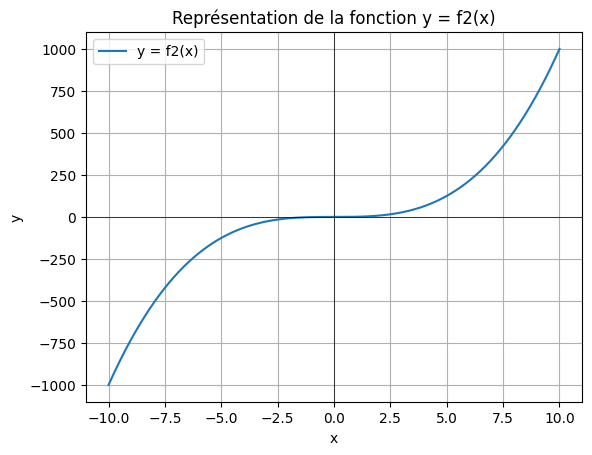

In [25]:
plot_function(f2,(-10,10),1000)

A première vu, il devrait avoir un point qui ferait diverger notre algorythme, en y=0.
L'algorythme va avoir un probleme car la dérivé va se rapprocher de 0 et donc le rapport de la fct avec sa dervié va diverger.
Il faut alors trouver une solution, mettre une condition sur le rapport et mettre a jour le le x 

In [26]:
racine = newton_raphson(0.000006,1e-6,1000,f2,df2)
print(f"Racine trouvée : {racine}")

OverflowError: (34, 'Result too large')

3) 𝑥 ⟼ ln (𝑥)


In [27]:
def f3(x) :
    return np.log(x)

In [28]:
def df3(x):
    return (1/x)

C:\Users\paull\AppData\Local\Temp\ipykernel_15276\3899268680.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)


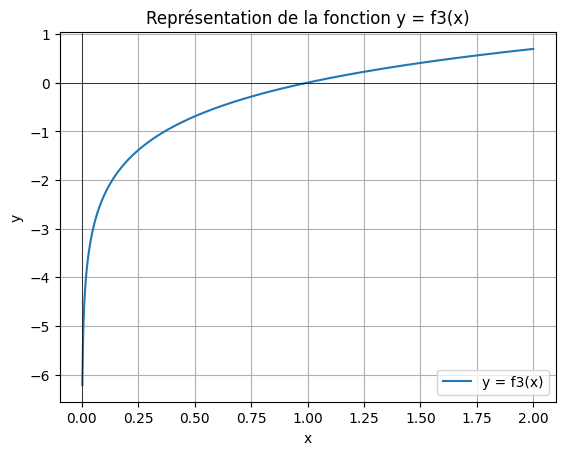

In [29]:
plot_function(f3,(-2,2),1000)

Ici il n'y a pas de problème apparent

In [30]:
newton_raphson(2.25,1e-6,10000,f3,df3)

0.9999999999999991

4) 𝑥 ⟼ arctan(𝑥) + 2(cos(cos(𝑥)) − 1)

In [31]:
def f4(x) :
    return np.arctan(x) + 2*(np.cos(np.cos(x)) - 1 )

In [32]:
def derivee_approx(f, x, h=0.0001):
        return (f(x + h) - f(x)) / h

In [33]:
def df4(x) :
    return derivee_approx(f4,x)

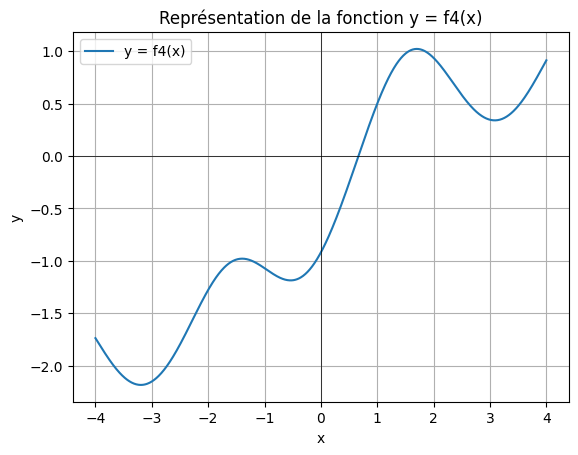

In [34]:
plot_function(f4,(-4,4),1000)

In [35]:
newton_raphson(1,1e-6,1000,f4,df4)

0.6656940811421019

5)  𝑥 ⟼ 1 − exp (−𝑥**2)

In [36]:
def f5(x) :
    return 1 - np.exp(-(x)**2)

In [37]:
def df5(x) :
    return derivee_approx(f5,x)

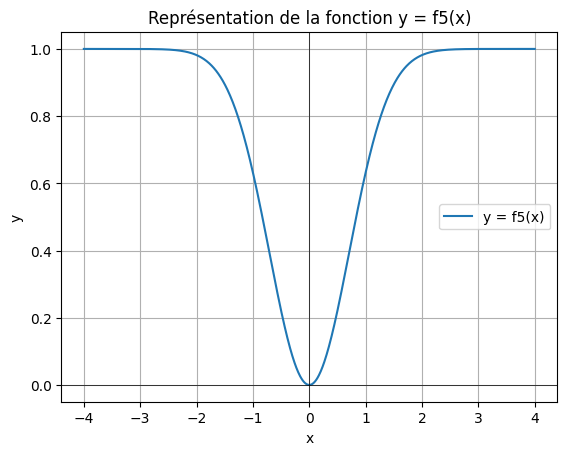

In [38]:
plot_function(f5,(-4,4),1000)

On voit que l'algorythme devrait converger vers -3.25 environs si l'on se place a gauche et vers 3.25 si l'on se place à droite

In [39]:
newton_raphson(1,1e-6,1000,f5,df5)

9.845129344718477e-06

C'est bon, ici nous avonq une racine a 0

6) 𝑥 ⟼ np.sqrt(abs(x))


In [40]:
def f6(x) :
    return np.sqrt(abs(x))

In [41]:
def df6(x) :
    return 1/(2*np.sqrt(abs(x)))

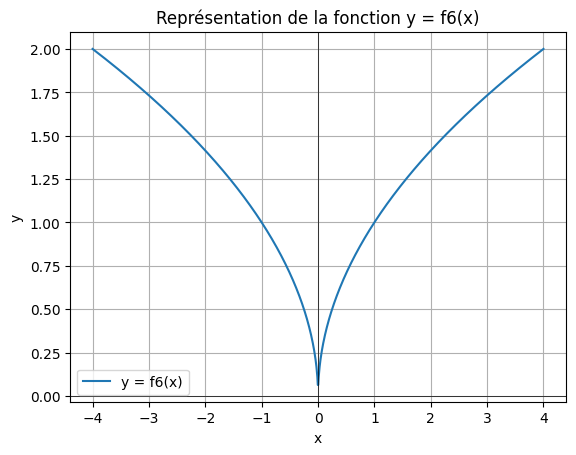

In [42]:
plot_function(f6,(-4,4),1000)

On voit ici que la fonction n'a pas de zero donc l'algorythme n'arrivera pas à converger 

In [43]:
newton_raphson(1,1e-6,1000,f6,df6)

C:\Users\paull\AppData\Local\Temp\ipykernel_15276\22045847.py:11: RuntimeWarning: overflow encountered in scalar divide
  x_new = x - f(x) / df(x)
C:\Users\paull\AppData\Local\Temp\ipykernel_15276\22045847.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(x_new - x) < epsilon:


ValueError: L'algorithme de Newton-Raphson n'a pas convergé après 1000 itérations.

(𝑥, 𝑦) ⟼ (𝑥**2)𝑦 + 2

Dimension 2, il faut passer par la jacobienne ou par la méthode d'itération qui est plus simple mais c'est de la cuisine dans le sens ou il faut chercher

In [57]:

def newton_iterative(x0, y0, epsilon, max_iter,f,dfdx,dfdy):
    x, y = x0, y0
    for i in range(max_iter):
        x_new = x - f(x, y) / dfdx(x,y)
        y_new = y - f(x_new, y) / dfdy(x_new,y)

        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            return x_new, y_new

        x, y = x_new, y_new
        
    raise ValueError("La méthode n'a pas convergé après {} itérations".format(max_iter))


In [46]:
def f7(x,y) :
    return (x**2)*y + 2

In [47]:
def df7dx(x,y) :
    return 2*x*y

In [48]:
def df7dy(x,y) :
    return x**2

In [56]:
newton_iterative(1,1,1e-6,1000,f7,df7dx,df7dy)

(-0.5, -8.0)

Ici nous avons une solution en partant de x = 1, y = 1

8) (𝑥, 𝑦) ⟼ ln(1 + (𝑥^2 + 𝑦^2 − 1)^2)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Pour le graphique 3D

def plot_function3d(f, x_range=(-5, 5), y_range=(-5, 5), num_points=400):
    """
    Tracer une fonction à deux variables.
    
    Paramètres:
    f (callable): La fonction à deux variables à tracer.
    x_range (tuple): La plage des valeurs de x à utiliser pour le tracé.
    y_range (tuple): La plage des valeurs de y à utiliser pour le tracé.
    num_points (int): Le nombre de points à utiliser pour le tracé.
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    x, y = np.meshgrid(x, y)
    z = f(x, y)
    
    fig = plt.figure(figsize=(12, 6))
    
    # Contour plot
    ax1 = fig.add_subplot(121)
    cp = ax1.contourf(x, y, z, cmap='viridis')
    fig.colorbar(cp, ax=ax1)
    ax1.set_title('Contour Plot')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    # 3D surface plot
    ax2 = fig.add_subplot(122, projection='3d')
    surf = ax2.plot_surface(x, y, z, cmap='viridis', antialiased=False)
    fig.colorbar(surf, ax=ax2)
    ax2.set_title('3D Surface Plot')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('f(x, y)')
    
    plt.show()


In [69]:
def f8(x,y) :
    return np.log(1 + (x**2 + y**2 - 1)**2)

In [70]:
def derivee_approx2dx(f, x,y, h=0.0001):
        return (f(x + h,y) - f(x,y)) / h

In [71]:
def derivee_approx2dy(f, x,y, h=0.0001):
        return (f(x,y + h) - f(x,y)) / h

In [72]:
def newton_iterative_dfapprox(x0, y0, epsilon, max_iter,f):
    x, y = x0, y0
    for i in range(max_iter):
        x_new = x - f(x, y) / derivee_approx2dx(f, x, y)
        y_new = y - f(x_new, y) / derivee_approx2dy(f, x_new, y)

        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            return x_new, y_new

        x, y = x_new, y_new
        
    raise ValueError("La méthode n'a pas convergé après {} itérations".format(max_iter))



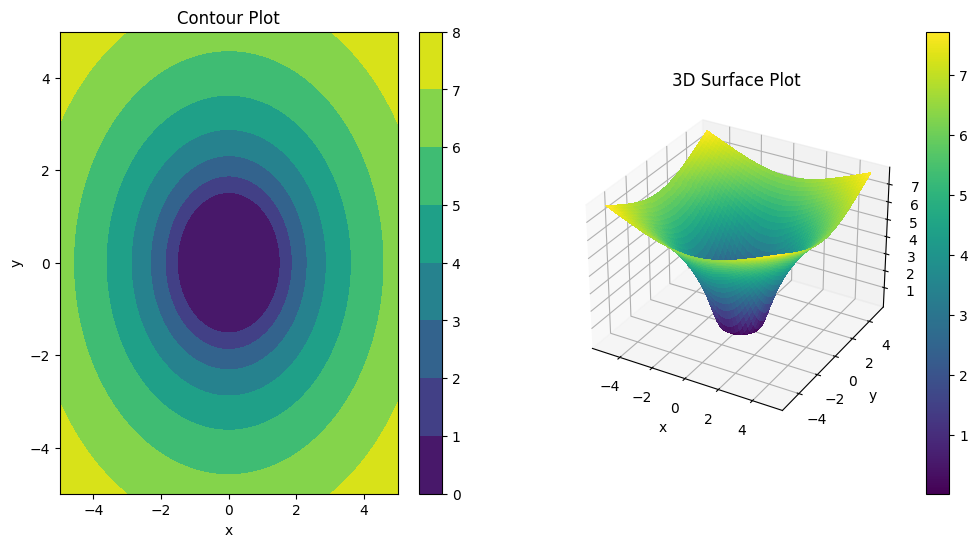

In [82]:
plot_function3d(f8)

In [74]:
newton_iterative_dfapprox(1,1,1e-6,1000,f8)

(0.539202558417779, 0.8421815954156419)

Fonction d’Ackley


In [75]:
import numpy as np

def f9(x, y):
    # Le nombre de dimensions est 2 dans ce cas spécifique.
    n = 2  
    
    # Calculer la somme des carrés
    sum_sq = x**2 + y**2
    
    # Calculer la somme des cosinus
    sum_cos = np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)
    
    # Calculer la valeur de la fonction d'Ackley
    term1 = -20 * np.exp(-0.2 * np.sqrt(sum_sq / n))
    term2 = -np.exp(sum_cos / n)
    
    return term1 + term2 + 20 + np.e



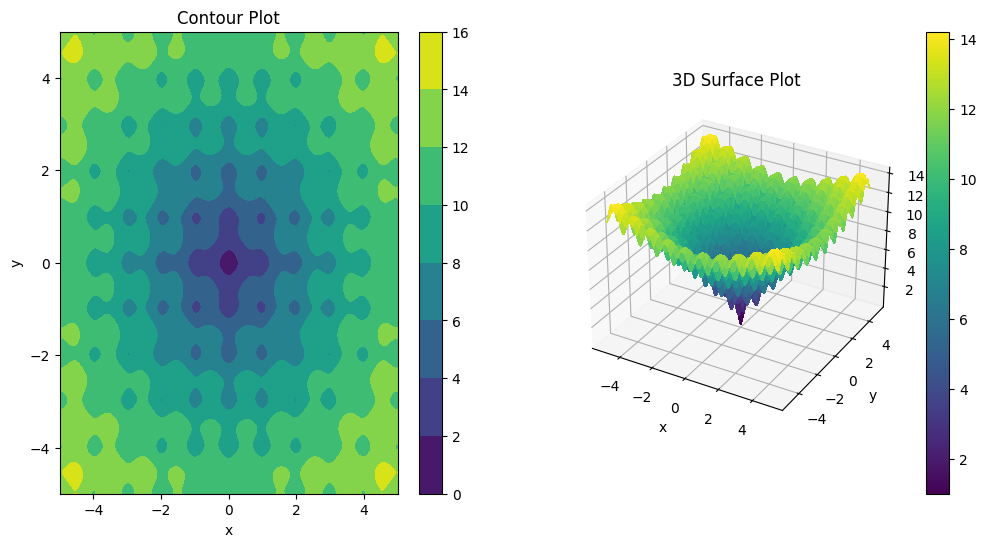

In [83]:
plot_function3d(f9)

In [88]:
newton_iterative_dfapprox(0,0,1e-6,1000,f9)

(-1.568615677824618e-16, -1.568615677824618e-16)

Dans la seconde partie il faudra mettre cette algorythme en pratique dans un cas réel de la finance pour le pricing d'option avec blackscholes

Représenter le prix d’un call européen en fonction de la volatilité et calibrer la volatilité implicite. 


La calibrage de la volatilité implicite consiste à trouver la volatilité qui, lorsqu'elle est utilisée dans un modèle d'évaluation d'options (comme le modèle Black-Scholes pour les options européennes ou une simulation de Monte Carlo pour les options asiatiques), donne un prix qui correspond au prix observé sur le marché.

Pour l'Option Européenne

1) Choisir un modèle: Le modèle de Black-Scholes a été utilisé, car il fournit une formule fermée pour évaluer les options européennes.

2) Trouver la Racine: On utilise une méthode de recherche de racine comme la méthode de Newton-Raphson pour trouver la volatilité qui donne le prix du marché de l'option. Cette méthode nécessite une estimation initiale de la volatilité et itère jusqu'à ce qu'elle trouve une valeur de la volatilité qui minimise la différence entre le prix du modèle et le prix du marché.

3) Dérivée ou Vega: Pour utiliser la méthode de Newton-Raphson, nous avons besoin de la dérivée de la fonction par rapport à la volatilité, appelée Vega, qui est calculée à l'aide de la formule de Black-Scholes.

In [90]:
from scipy.stats import norm

def black_scholes_call_price(S0, K, T, r, sigma):
    """
    Calcule le prix d'un call européen en utilisant le modèle Black-Scholes.
    
    :param S0: Prix spot de l'actif sous-jacent
    :param K: Prix d'exercice (Strike Price)
    :param T: Temps jusqu'à l'échéance (en années)
    :param r: Taux d'intérêt sans risque
    :param sigma: Volatilité de l'actif sous-jacent
    :return: Prix du call européen
    """
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


Pour plot la prix du call en fonction de la volatilité : 

Idée de base:

1) Générer une série de valeurs de volatilité.
2) Calculer le prix du call pour chaque volatilité en utilisant le modèle de Black-Scholes.
3) Tracer le prix du call en fonction de la volatilité.

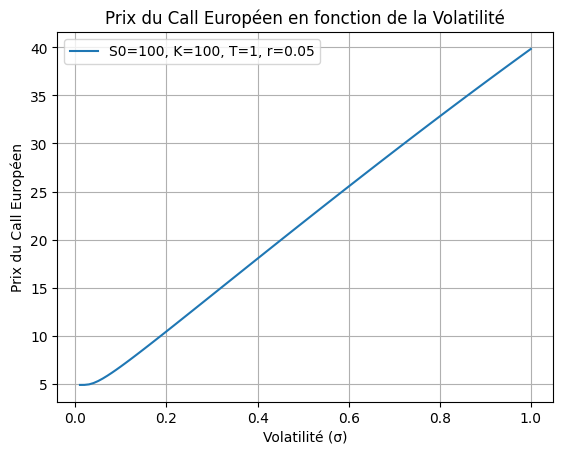

In [93]:
def plot_call_price_vs_volatility(S0, K, T, r):
    """
    Représente graphiquement le prix d'un call européen en fonction de la volatilité.
    
    :param S0: Prix spot de l'actif sous-jacent
    :param K: Prix d'exercice (Strike Price)
    :param T: Temps jusqu'à l'échéance (en années)
    :param r: Taux d'intérêt sans risque
    """
    sigmas = np.linspace(0.01, 1, 100)  # Vecteur de volatilités
    prices = [black_scholes_call_price(S0, K, T, r, sigma) for sigma in sigmas]
    
    plt.plot(sigmas, prices, label=f'S0={S0}, K={K}, T={T}, r={r}')
    plt.xlabel('Volatilité (σ)')
    plt.ylabel('Prix du Call Européen')
    plt.title('Prix du Call Européen en fonction de la Volatilité')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paramètres
S0 = 100  # Prix spot de l'actif sous-jacent
K = 100  # Prix d'exercice (Strike Price)
T = 1  # Temps jusqu'à l'échéance (en années)
r = 0.05  # Taux d'intérêt sans risque

plot_call_price_vs_volatility(S0, K, T, r)

In [97]:
def norm_cdf(x):
    """Calcul la fonction de répartition cumulative pour une loi normale standard"""
    q = 0.5 * (1.0 + np.erf(x / np.sqrt(2.0)))
    return q


def norm_pdf(x):
    """Calcul la densité de probabilité pour une loi normale standard"""
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x * x)

In [98]:
def black_scholes_vega(S0, K, T, r, sigma):
    """Calcul Vega de l'option Call européenne dans le modèle de Black-Scholes"""
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm_pdf(d1)

In [99]:
def implied_volatility_newton_raphson(S0, K, T, r, market_price, sigma_initial_guess=0.2, max_iterations=100, epsilon=1e-6):
    sigma = sigma_initial_guess
    for i in range(max_iterations):
        price = black_scholes_call_price(S0, K, T, r, sigma)
        vega = black_scholes_vega(S0, K, T, r, sigma)
        
        # Calcul de la nouvelle estimation de la volatilité
        sigma = sigma - (price - market_price) / vega
        
        # Vérification de la convergence
        if abs(price - market_price) < epsilon:
            return sigma
    return sigma  # Retourne la dernière estimation si la méthode ne converge pas

# Paramètres
S0 = 100  # Prix spot de l'actif sous-jacent
K = 100  # Prix d'exercice (Strike Price)
T = 1    # Temps jusqu'à l'échéance (en années)
r = 0.05 # Taux d'intérêt sans risque
market_price = 10  # Prix du call observé sur le marché

# Calcul et affichage de la volatilité implicite
vol_implicite = implied_volatility_newton_raphson(S0, K, T, r, market_price)
print(f"La volatilité implicite est {vol_implicite:.6f}")


La volatilité implicite est 0.187972


2) Même chose pour une option asiatique. 

Une option asiatique est une option dont le prix dépend de la moyenne de la valeur du sous jacent sur la période voulu. contrairement aux options américaines ou européenne dont la valeur du sous jacent est prit a un moment précis.


Pour l'Option Asiatique

1) Choisir un modèle: Puisqu'il n'y a pas de formule fermée pour les options asiatiques, une estimation du prix a été obtenue en utilisant la simulation de Monte Carlo.

2) Trouver la Racine: Tout comme pour l'option européenne, la méthode de Newton-Raphson a été utilisée pour trouver la volatilité implicite. Cependant, puisque nous n'avons pas de formule fermée, nous ne pouvons pas calculer Vega directement.

3) Approximation de Vega: Pour calculer Vega, nous avons utilisé une différenciation numérique: en calculant le prix de l'option pour deux volatilités légèrement différentes et en divisant la différence des prix par la différence des volatilités.

En bref, le processus de calibrage de la volatilité implicite implique l'utilisation d'une méthode numérique pour trouver la volatilité qui permet au prix calculé par le modèle de correspondre le plus précisément possible au prix observé sur le marché, en tenant compte de la nature de l'option et des modèles disponibles pour son évaluation.

In [103]:
import math
import numpy as np

def asian_option_monte_carlo_price(S0, K, T, r, sigma, n_simulations=10000, n_steps=100):
    dt = T / n_steps
    total_payoff = 0
    
    for _ in range(n_simulations):
        path = np.zeros(n_steps)
        path[0] = S0
        for t in range(1, n_steps):
            z = np.random.standard_normal()
            path[t] = path[t - 1] * math.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z)
        
        average_price = np.mean(path)
        total_payoff += max(average_price - K, 0)
    
    option_price = math.exp(-r * T) * total_payoff / n_simulations
    return option_price




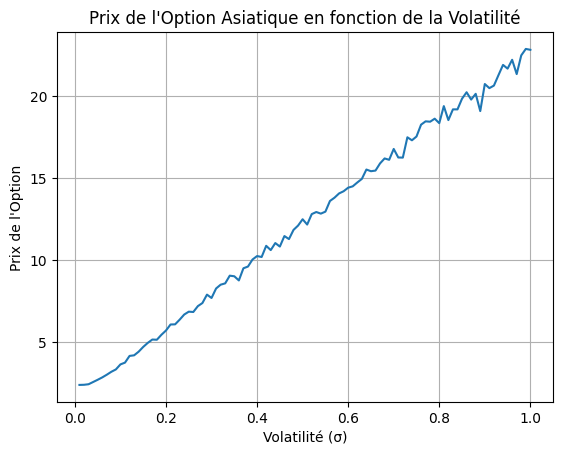

In [104]:
import matplotlib.pyplot as plt

def plot_asian_option_price_vs_volatility(S0, K, T, r):
    volatilities = np.linspace(0.01, 1, 100)  # On génère un range de volatilités de 1% à 100%
    prices = [asian_option_monte_carlo_price(S0, K, T, r, sigma) for sigma in volatilities]
    
    plt.plot(volatilities, prices)
    plt.title('Prix de l\'Option Asiatique en fonction de la Volatilité')
    plt.xlabel('Volatilité (σ)')
    plt.ylabel('Prix de l\'Option')
    plt.grid(True)
    plt.show()

# Paramètres
S0 = 100  # Prix spot de l'actif sous-jacent
K = 100   # Prix d'exercice (Strike Price)
T = 1     # Temps jusqu'à l'échéance (en années)
r = 0.05  # Taux d'intérêt sans risque

plot_asian_option_price_vs_volatility(S0, K, T, r)


In [105]:
def newton_raphson_volatility(S0, K, T, r, market_price, initial_guess=0.2, n_iterations=100, tol=1e-6):
    sigma = initial_guess
    for _ in range(n_iterations):
        price = asian_option_monte_carlo_price(S0, K, T, r, sigma)
        if abs(price - market_price) < tol:
            return sigma
        
        # Vega for Asian option is not straightforward to compute, so we use numerical differentiation
        epsilon = 1e-6
        price_plus_epsilon = asian_option_monte_carlo_price(S0, K, T, r, sigma + epsilon)
        vega_approx = (price_plus_epsilon - price) / epsilon
        
        sigma = sigma - (price - market_price) / vega_approx

    return sigma  # Return the last estimation if the method does not converge

# Initial parameters
S0 = 100
K = 100
T = 1
r = 0.05
market_price = 6

estimated_volatility = newton_raphson_volatility(S0, K, T, r, market_price)
print(f"Estimated volatility: {estimated_volatility:.6f}")

Estimated volatility: 0.203221
